In [24]:
import glob
import os
import matplotlib.pyplot as plt

In [6]:
mylist  =[]
with open('/home/csweeney/AttentionSceneClassification/train.txt') as f:
    mylist = f.read().splitlines() 
    
ddir = '/home/csweeney/images_test/images/'
j = glob.glob(ddir+"/*/*.jpg")
for i in j:
    o = i.split("/")
    os.rename(i, '/home/csweeney/images_test/saliency/'+o[-1])

In [9]:
# ddir = '/home/csweeney/AttentionSceneClassification/images/'
# j = glob.glob(ddir+"/*/*.jpg")
# for i in j:
#     for l in mylist:
#         if l in i:
#             os.rename(i, '/home/csweeney/AttentionSceneClassification/images_test/'+l)
#             break

In [66]:
from resnet import resnet152

ImportError: cannot import name add

In [7]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint


# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '/home/csweeney/AttentionSceneClassification/images/'
validation_data_dir = '/home/csweeney/AttentionSceneClassification/images_test/'
nb_train_samples = 1000
nb_validation_samples = 800
epochs = 50
batch_size = 4

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# build the VGG16 network
model = applications.VGG16(weights="imagenet", include_top=True, input_shape = (img_height,img_width,3))
# resnet_model = resnet152.resnet152_model(WEIGHTS_RESNET)
# feature_layer = 'avg_pool'
# features_model = Model(inputs=resnet_model.input,
#                        outputs=resnet_model.get_layer(feature_layer).output)

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
# top_model.add(Flatten(input_shape=model.output_shape[1:]))
# top_model.add(Dense(256, activation='relu'))
# top_model.add(Dropout(0.5))
top_model.add(Dense(67, activation='softmax',input_shape=model.output_shape[1:]))


new_model = Sequential() #new model
for layer in model.layers: 
    new_model.add(layer)

new_model.add(top_model)
print new_model.summary()
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in new_model.layers[:25]:
    layer.trainable = False


tb = TensorBoard(log_dir='./logs', write_images=True)
mc = ModelCheckpoint(filepath="weights.best.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
new_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])
    
new_model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples,
    callbacks=[tb,mc])
# fit_generator(self, generator, samples_per_epoch, nb_epoch, verbose=1, callbacks=None, validation_data=None, nb_val_samples=None, class_weight=None, max_q_size=10, nb_worker=1, pickle_safe=False, initial_epoch=0)

Found 14280 images belonging to 67 classes.
Found 1347 images belonging to 67 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

/home/csweeney/.local/lib/python2.7/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=50, callbacks=[<keras.ca..., validation_steps=800)`
  '` call to the Keras 2 API: ' + signature)


Epoch 1/50
 92/250 [==========>...................] - ETA: 87s - loss: 4.2034 - acc: 0.0217

KeyboardInterrupt: 

In [10]:
import skimage
import numpy as np
import matplotlib as plt


In [11]:
names_to_ids= {"airport_inside": 0, "artstudio": 1, "auditorium": 2, "bakery": 3, "bar": 4, "bathroom": 5, "bedroom": 6, "bookstore": 7, "bowling": 8, "buffet": 9, "casino": 10, "children_room": 11, "church_inside": 12, "classroom": 13, "cloister": 14, "closet": 15, "clothingstore": 16, "computerroom": 17, "concert_hall": 18, "corridor": 19, "deli": 20, "dentaloffice": 21, "dining_room": 22, "elevator": 23, "fastfood_restaurant": 24, "florist": 25, "gameroom": 26, "garage": 27, "greenhouse": 28, "grocerystore": 29, "gym": 30, "hairsalon": 31, "hospitalroom": 32, "inside_bus": 33, "inside_subway": 34, "jewelleryshop": 35, "kindergarden": 36, "kitchen": 37, "laboratorywet": 38, "laundromat": 39, "library": 40, "livingroom": 41, "lobby": 42, "locker_room": 43, "mall": 44, "meeting_room": 45, "movietheater": 46, "museum": 47, "nursery": 48, "office": 49, "operating_room": 50, "pantry": 51, "poolinside": 52, "prisoncell": 53, "restaurant": 54, "restaurant_kitchen": 55, "shoeshop": 56, "stairscase": 57, "studiomusic": 58, "subway": 59, "toystore": 60, "trainstation": 61, "tv_studio": 62, "videostore": 63, "waitingroom": 64, "warehouse": 65, "winecellar": 66}
ids_to_names = dict(zip(names_to_ids.values(), names_to_ids.keys()))

In [12]:
choice = None
with open('/home/csweeney/AttentionSceneClassification/test.txt') as f:
    choice = np.random.choice(f.read().splitlines())
path = "/home/csweeney/AttentionSceneClassification/images_test/"+choice
im = skimage.io.imread(path)
transformed = preprocess(im)

# Classify
prediction = new_model.predict(transformed)
print prediction
# Print result
prediction = prediction.flatten()
top_idx = np.argsort(prediction)[::-1][:5]
for i, idx in enumerate(top_idx):
     print("{}. {:.2f} {}".format(i + 1, prediction[idx], ids_to_names[idx]))

# Show image
skimage.io.imshow(im)

NameError: name 'preprocess' is not defined

In [14]:
def preprocess(im):

    """
    Preprocesses image array for classifying using ImageNet trained Resnet-152 model
    :param im: RGB, RGBA float-type image or grayscale image
    :return: ready image for passing to a Resnet model
    """

    # Detect invalid images
    if im is None or not hasattr(im, 'shape') or len(im.shape) < 2: return None

    # If grayscale, convert to RGB
    if len(im.shape) == 2:
        im = np.asarray(np.dstack((im, im, im)), dtype=np.uint8)

    # Remove alpha channel, if necessary
    if im.shape[2] == 4:
        im = im[:, :, 0:3]

    if len(im.shape) < 2:
        print("Wrong image shape", im.shape)

    # RGB to BGR
#     im = im[:, :, ::-1]

    # Resize and scale values to <0, 255>
    im = skimage.transform.resize(im, (img_height, img_width), mode='constant').astype(np.float32)
    im *= 255

    # Subtract ImageNet mean
#     im[:, :, 0] -= 103.939
#     im[:, :, 1] -= 116.779
#     im[:, :, 2] -= 123.68

    # Add a dimension
    im = np.expand_dims(im, axis=0)

    return im

<IPython.core.display.Javascript object>


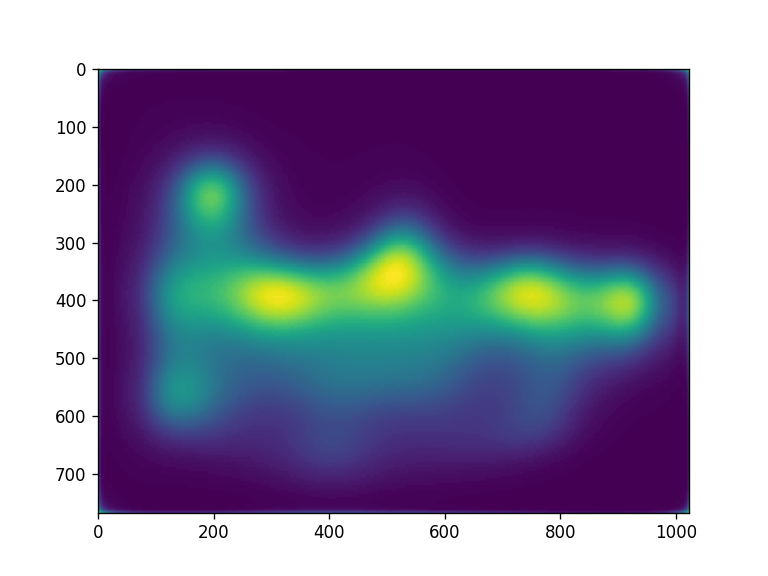

In [25]:
%matplotlib nbagg
sal_path = "/home/csweeney/images_test/saliency/00.jpg"
im = skimage.io.imread(sal_path)
plt.figure()
plt.imshow(im)

In [22]:
im/255.

array([[0.31372549, 0.30980392, 0.30196078, ..., 0.28627451, 0.29411765,
        0.29803922],
       [0.30980392, 0.30588235, 0.29803922, ..., 0.28235294, 0.29019608,
        0.29411765],
       [0.29803922, 0.29803922, 0.28627451, ..., 0.27058824, 0.28235294,
        0.28235294],
       ...,
       [0.29019608, 0.29019608, 0.28235294, ..., 0.27843137, 0.29019608,
        0.29411765],
       [0.30196078, 0.29803922, 0.29019608, ..., 0.29411765, 0.30588235,
        0.30588235],
       [0.30588235, 0.30196078, 0.29411765, ..., 0.29803922, 0.30980392,
        0.31372549]])

In [ ]:
def blur_img_saliency(img,)